In [1]:
from src.create_dataset import main
import matplotlib.pyplot as plt
import os
from os.path import join
import pickle
import numpy as np
import pandas as pd
import json
from itertools import product

In [2]:
from tqdm.notebook import tqdm

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

In [4]:
from typing import Dict, List

In [5]:
from src.convert_jsons_to_csvs import convert_jsons_to_csv

In [6]:
def get_subdataset(dataset: pd.DataFrame, hist_name: str, n_bins: int) -> pd.DataFrame:
      return dataset[(dataset.n_bins == n_bins) & 
                     (dataset.hist_type == hist_name)][['type', 'values']]

In [7]:
dataset = convert_jsons_to_csv('data3/histograms/', 'data3/labels.csv')

100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


In [8]:
dataset.head()

,model,type,model_name,hist_type,n_bins,values
0,1b220e0b-d7fa-40a0-8cfd-930a3228c668,Sphere,1b220e0b-d7fa-40a0-8cfd-930a3228c668,model_bounding_sphere_concentric_sphere,8,"[0, 0, 0, 0, 0.3373978709670946, 0.31850100387..."
1,1b220e0b-d7fa-40a0-8cfd-930a3228c668,Sphere,1b220e0b-d7fa-40a0-8cfd-930a3228c668,model_bounding_sphere_concentric_sphere,16,"[0, 0, 0, 0, 0, 0, 0, 0, 0.10627104869753085, ..."
2,1b220e0b-d7fa-40a0-8cfd-930a3228c668,Sphere,1b220e0b-d7fa-40a0-8cfd-930a3228c668,model_bounding_sphere_concentric_sphere,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1b220e0b-d7fa-40a0-8cfd-930a3228c668,Sphere,1b220e0b-d7fa-40a0-8cfd-930a3228c668,model_bounding_sphere_concentric_sphere,64,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1b220e0b-d7fa-40a0-8cfd-930a3228c668,Sphere,1b220e0b-d7fa-40a0-8cfd-930a3228c668,model_bounding_sphere_concentric_sphere,128,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


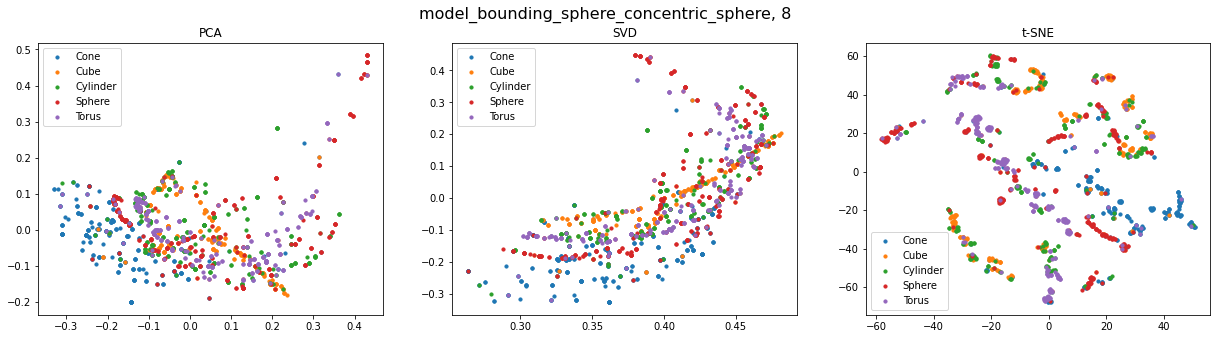

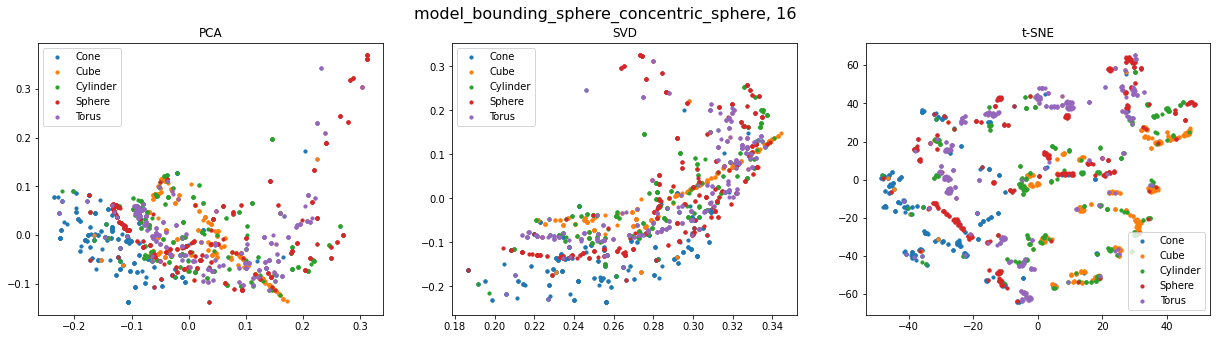

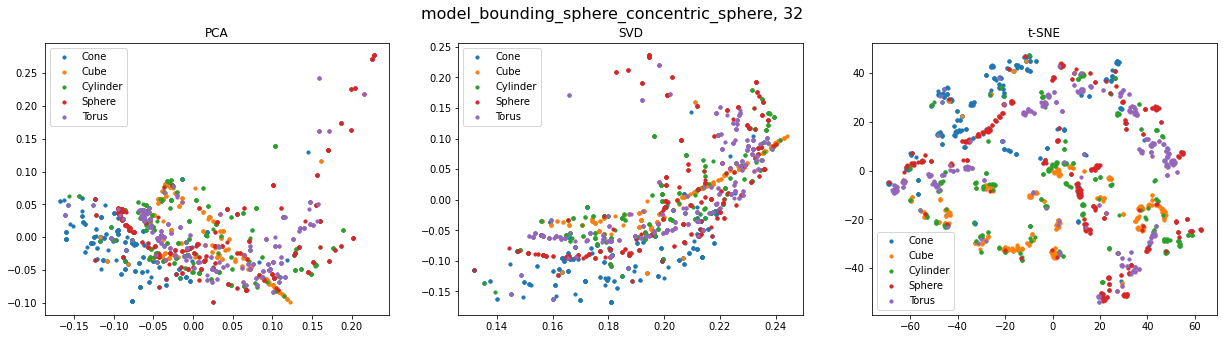

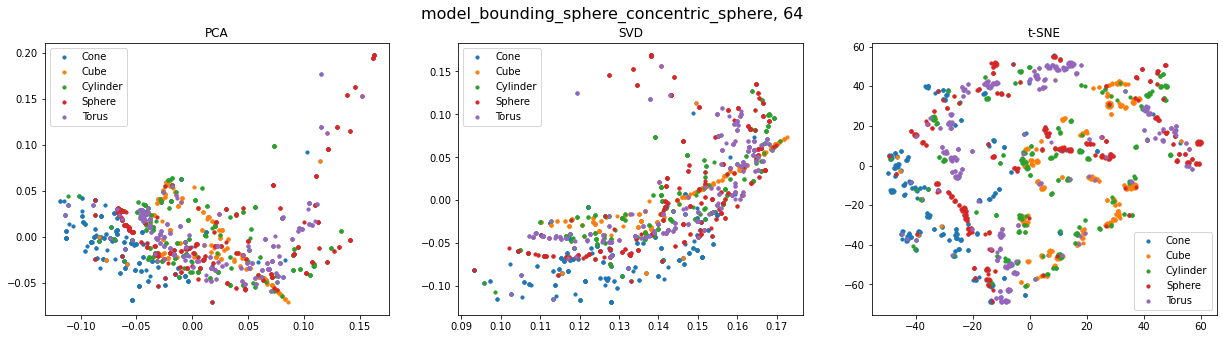

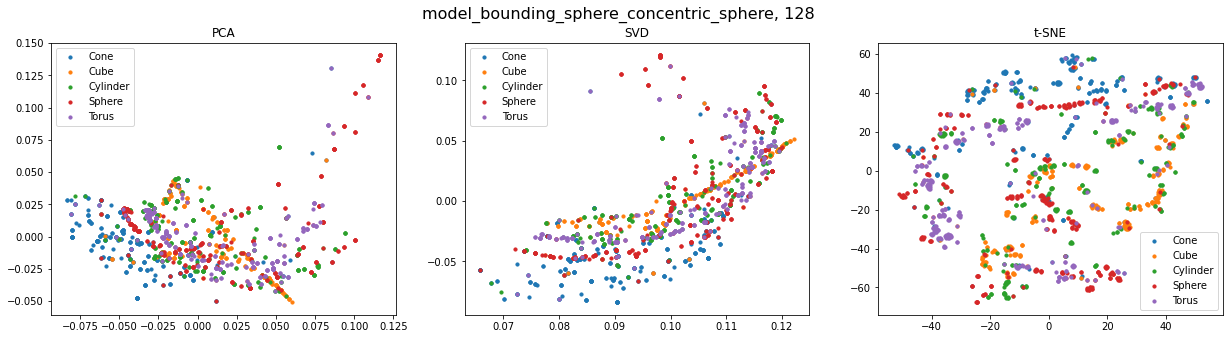

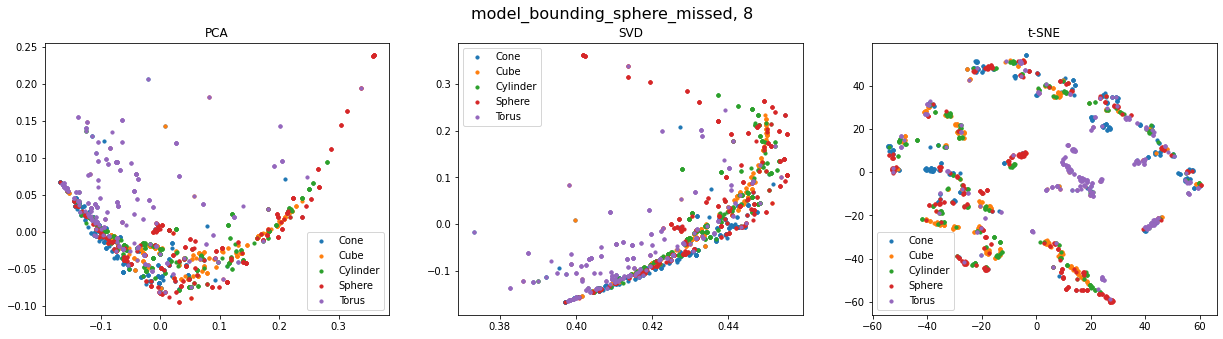

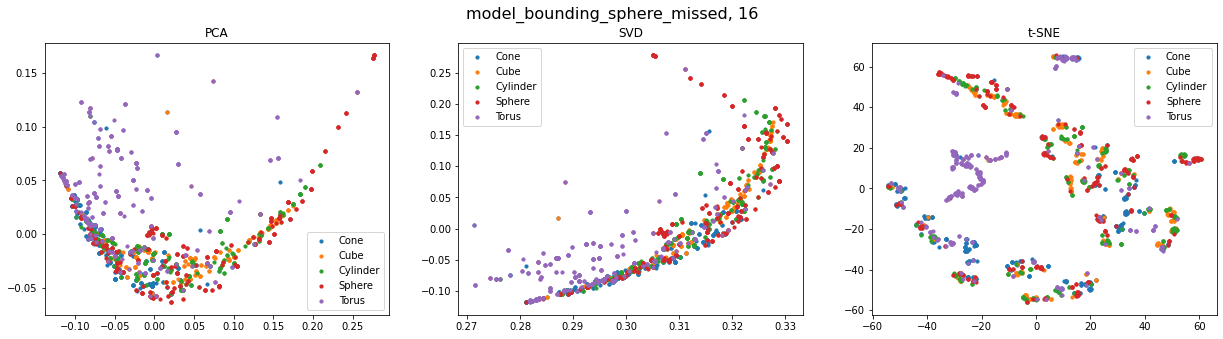

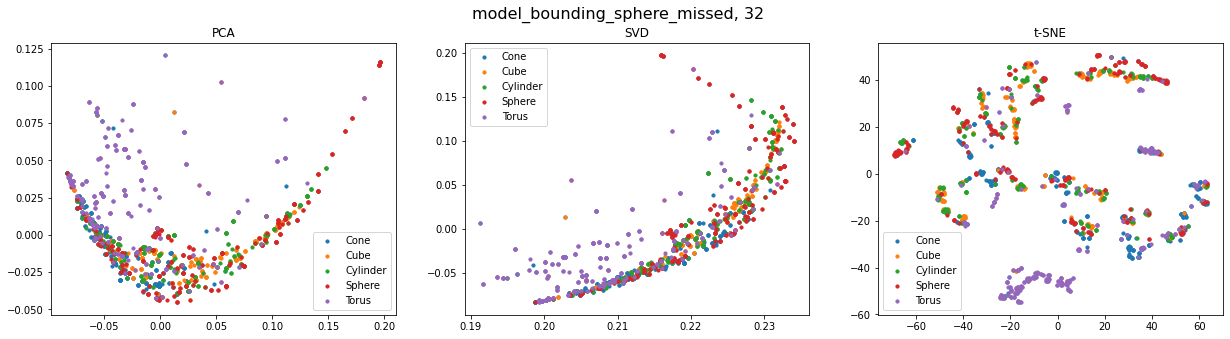

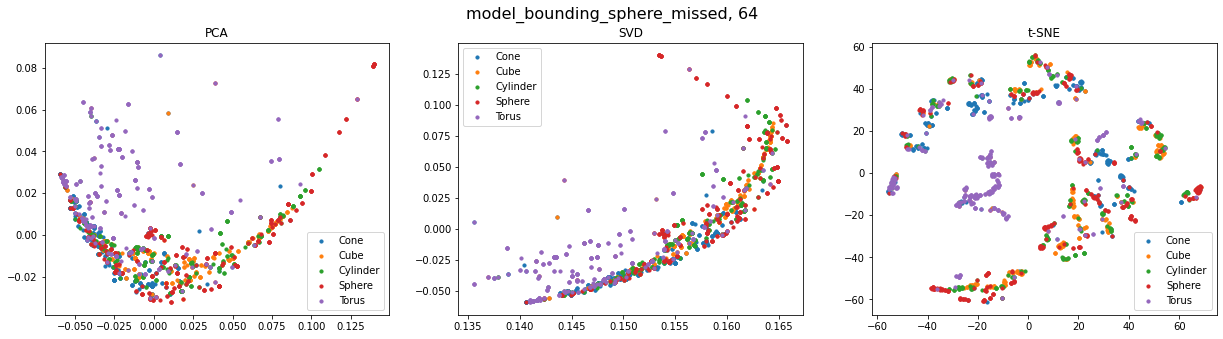

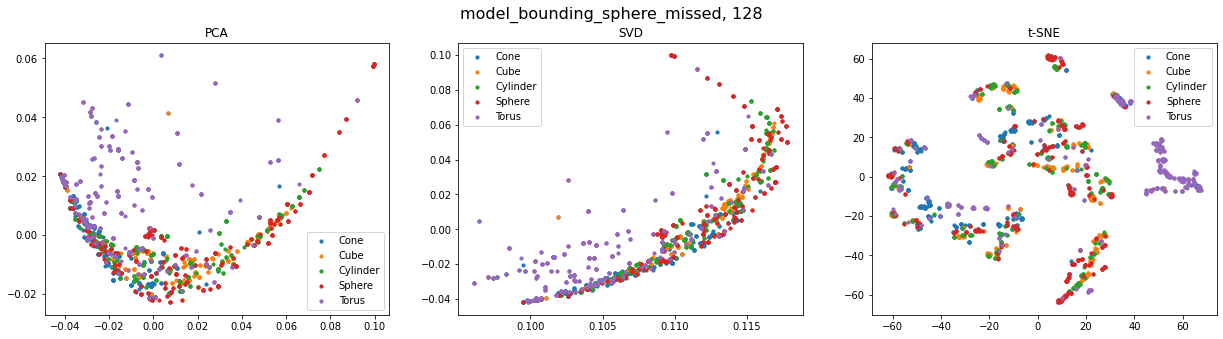

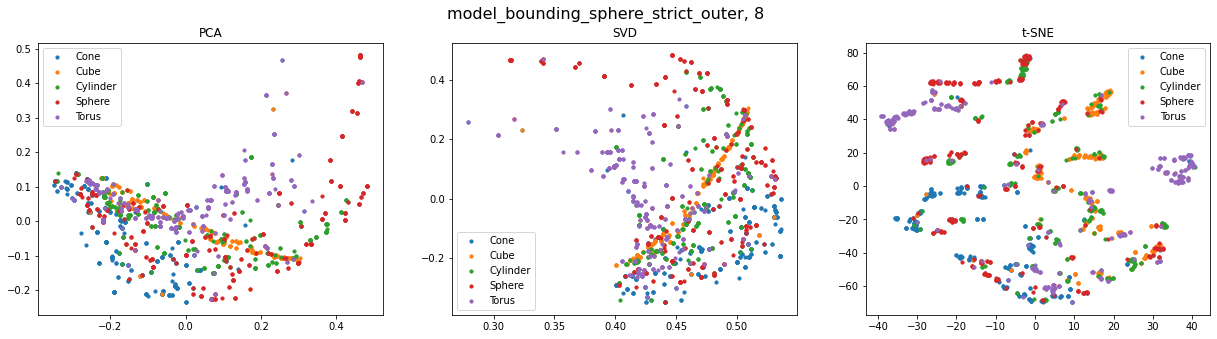

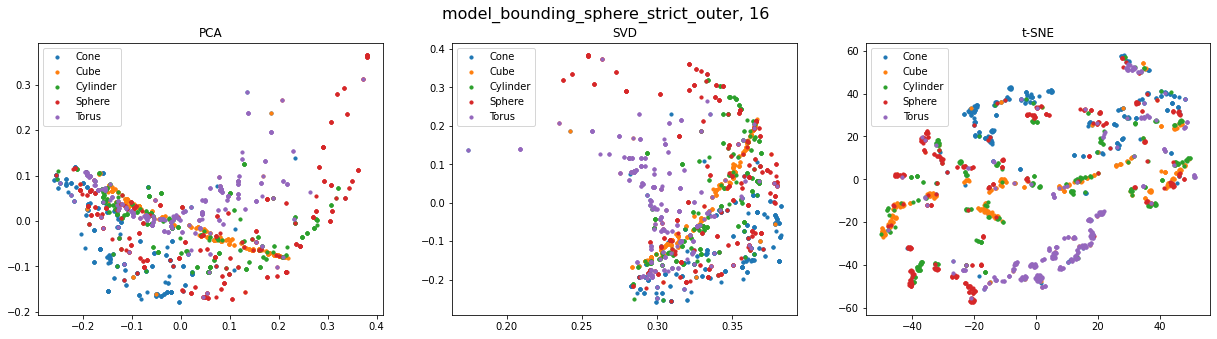

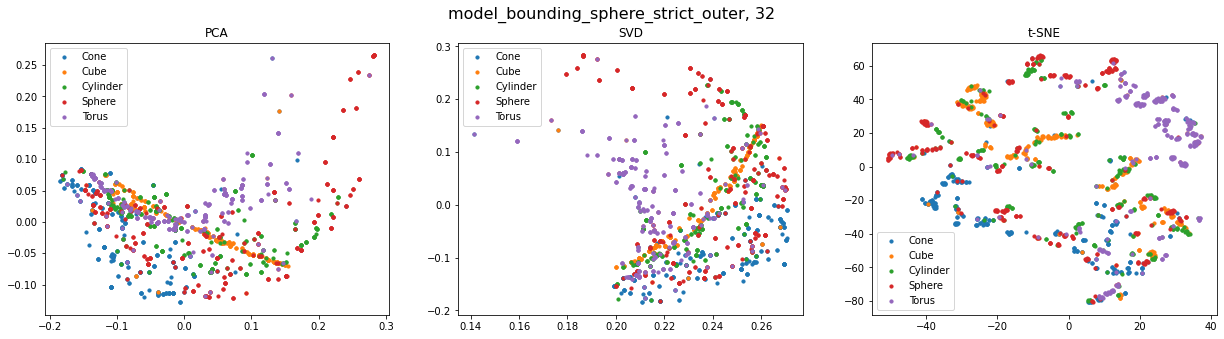

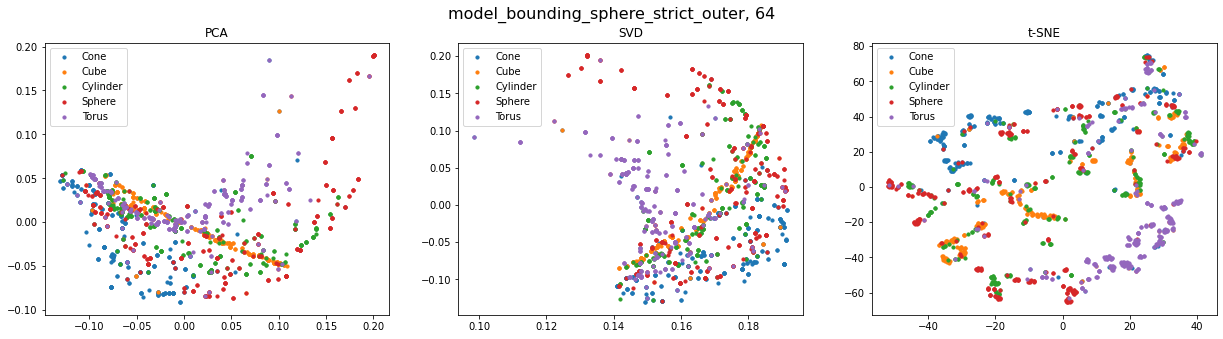

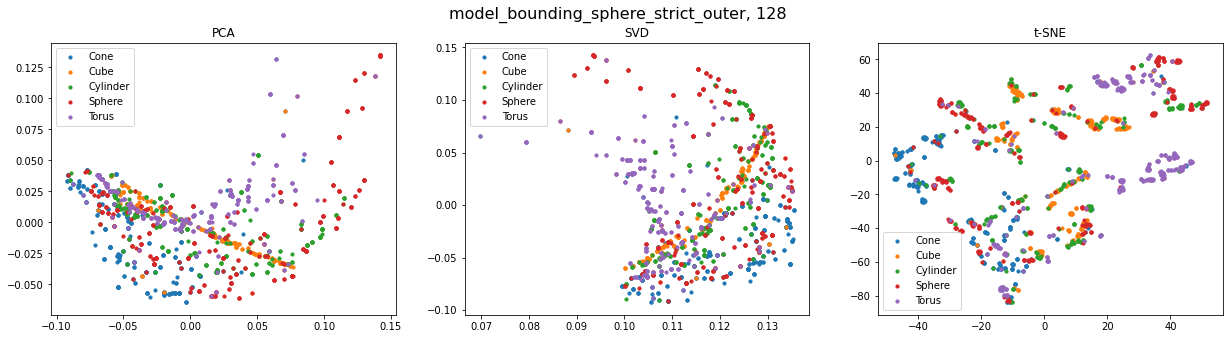

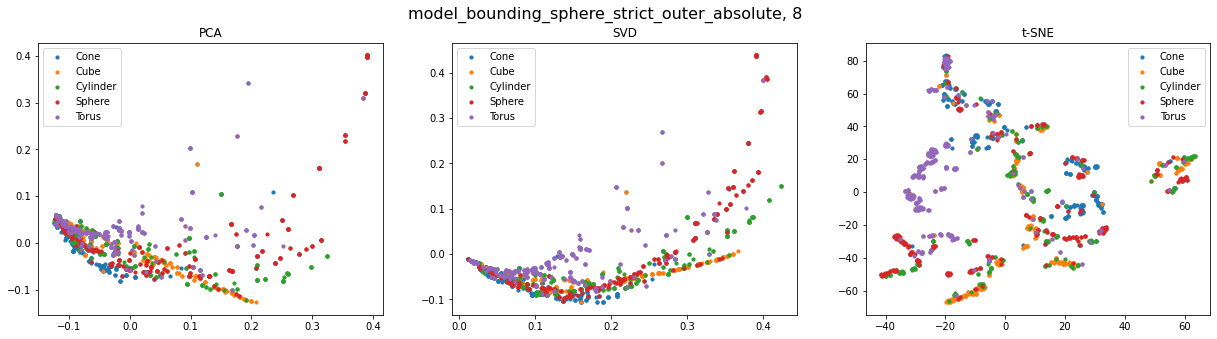

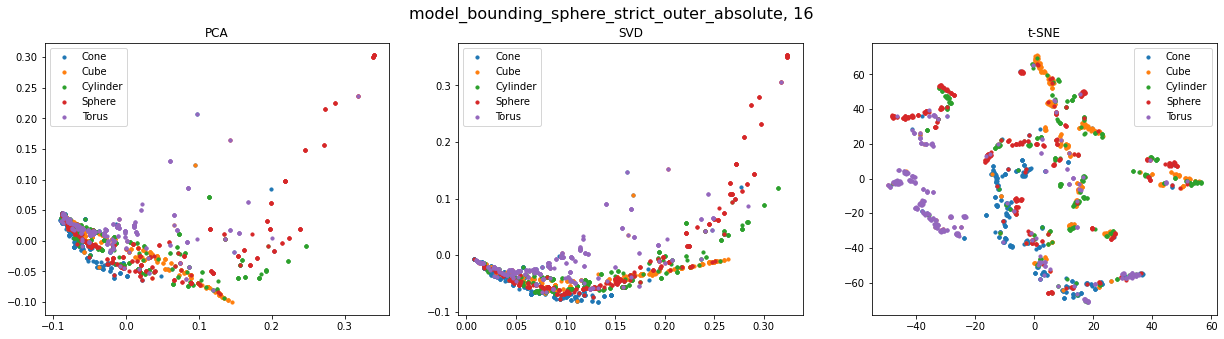

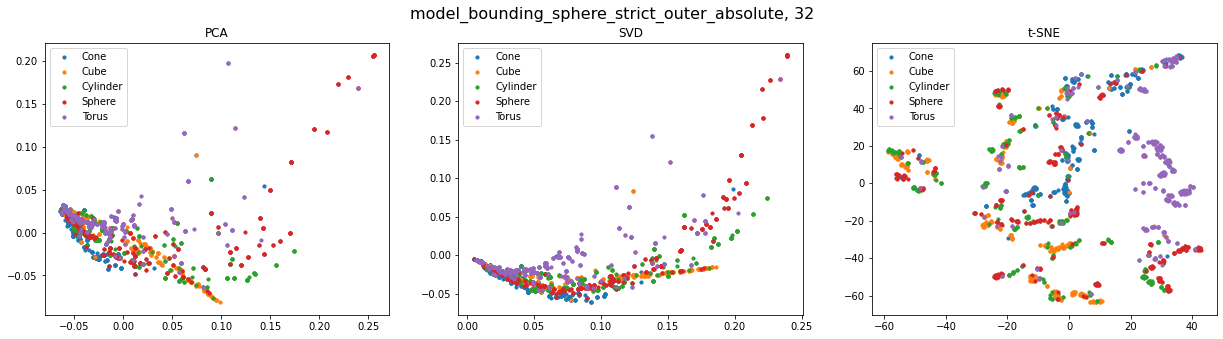

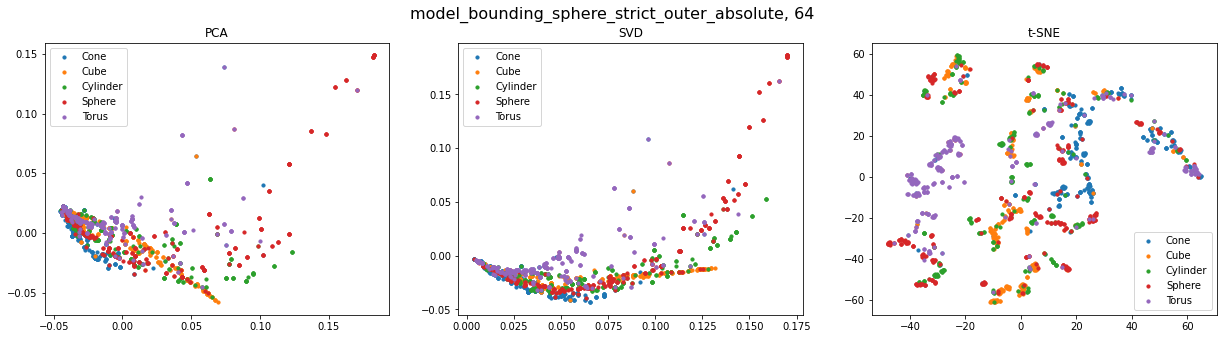

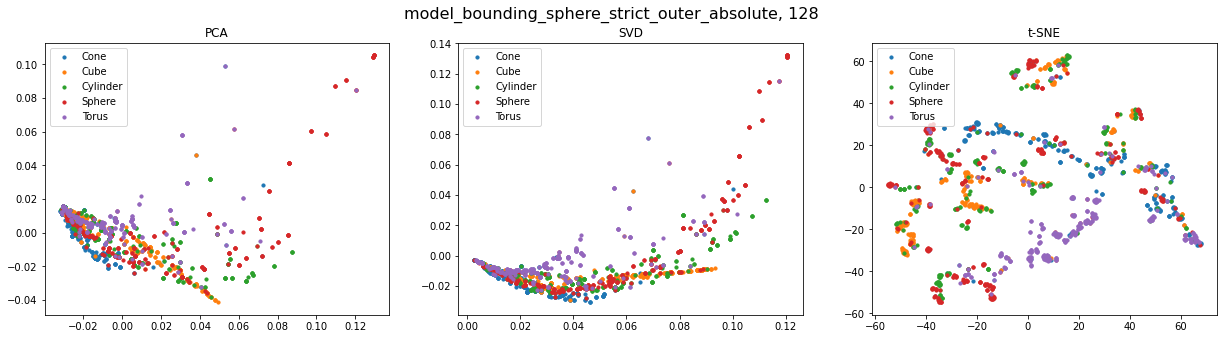

In [9]:
hists_types = ['model_bounding_sphere_concentric_sphere',
          'model_bounding_sphere_missed',
          'model_bounding_sphere_strict_outer',
          'model_bounding_sphere_strict_outer_absolute']

ns_bins = [8, 16, 32, 64, 128]


for hist_type, n_bins in tqdm(product(hists_types, ns_bins), total=len(list(product(hists_types, ns_bins)))):
    sub_dataset = get_subdataset(dataset, hist_type, n_bins)

    labels = sub_dataset.type.values
    u_labels = np.unique(labels)
    X = np.vstack(sub_dataset['values'].values)

    le = LabelEncoder().fit(labels)
    tr_labels = le.transform(labels)

    fig, axs = plt.subplots(1, 3, figsize=(21,5))
    pca = PCA(n_components=2)
    X_r = pca.fit_transform(X)
    for cls in np.unique(tr_labels):
        axs[0].scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1', label=u_labels[cls], s=10)
    axs[0].legend()
    
    X_r = TruncatedSVD(n_components=2).fit_transform(X)
    for cls in np.unique(tr_labels):
        axs[1].scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1', label=u_labels[cls], s=10)
    axs[1].legend()

    X_r = TSNE(n_components=2).fit_transform(X)
    for cls in np.unique(tr_labels):
        axs[2].scatter(X_r[tr_labels==cls, 0], X_r[tr_labels==cls, 1], cmap='Set1', label=u_labels[cls], s=10)
    axs[2].legend()
    
    axs[0].set_title('PCA')
    axs[1].set_title('SVD')
    axs[2].set_title('t-SNE')

    fig.suptitle(f'{hist_type}, {n_bins}', fontsize=16)